In [3]:
import pandas as pd
from sqlalchemy import create_engine

# Database connection 
db_username = "root"
db_password = "velvexita3*"
db_host = "localhost"
db_name = "hackathon"

# Creating connection
engine = create_engine(f"mysql+pymysql://{db_username}:{db_password}@{db_host}/{db_name}")

# Fetching data from SQL table
query = "SELECT * FROM sales_data"  
df = pd.read_sql(query, engine)


print(df.head())


   CustomerNo CustomerID  Gender Region  Age ProductName     Category  \
0           1   CUST0046    Male   West   22  Headphones  Accessories   
1           2   CUST0169  Female  South   54     Monitor  Electronics   
2           3   CUST0002    Male  North   23  Headphones  Accessories   
3           4   CUST0147    Male  North   64  Smartwatch    Wearables   
4           5   CUST0262    Male   East   27  Smartwatch    Wearables   

   UnitPrice  Quantity  TotalPrice  ShippingFee ShippingStatus   OrderDate  
0        100         2         200         6.93     In Transit    4/9/2023  
1        300         1         300        11.31       Returned   8/28/2023  
2        100         5         500        12.22      Delivered   1/18/2023  
3        200         2         400        11.26     In Transit   1/11/2023  
4        200         1         200        18.38     In Transit  10/23/2023  


In [4]:
# Check for any missed missing values
print(df.isnull().sum())

# Display cleaned data
print(df.info())


CustomerNo        0
CustomerID        0
Gender            0
Region            0
Age               0
ProductName       0
Category          0
UnitPrice         0
Quantity          0
TotalPrice        0
ShippingFee       0
ShippingStatus    0
OrderDate         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerNo      810 non-null    int64  
 1   CustomerID      810 non-null    object 
 2   Gender          810 non-null    object 
 3   Region          810 non-null    object 
 4   Age             810 non-null    int64  
 5   ProductName     810 non-null    object 
 6   Category        810 non-null    object 
 7   UnitPrice       810 non-null    int64  
 8   Quantity        810 non-null    int64  
 9   TotalPrice      810 non-null    int64  
 10  ShippingFee     810 non-null    float64
 11  ShippingStatus  810 non-null    

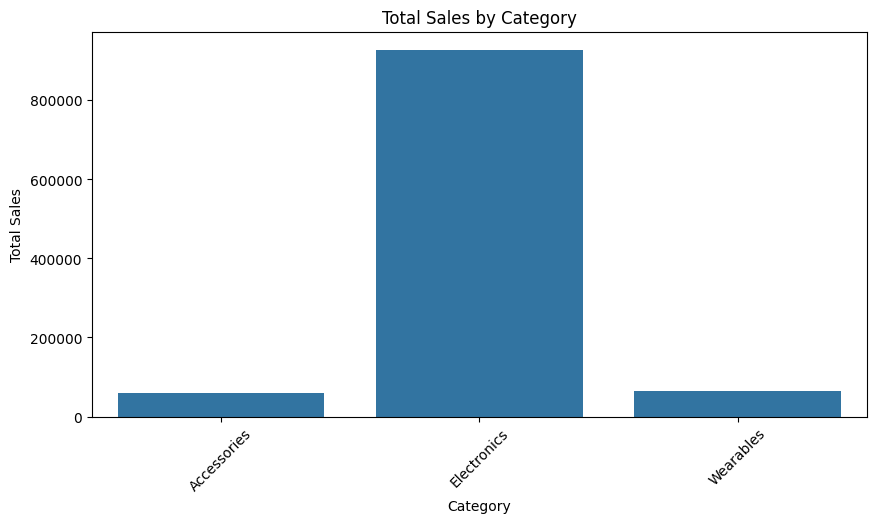

In [5]:
#EDA
#Total Sales by Category
import matplotlib.pyplot as plt
import seaborn as sns

# Group by category
sales_by_category = df.groupby('Category')['TotalPrice'].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.xticks(rotation=45)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


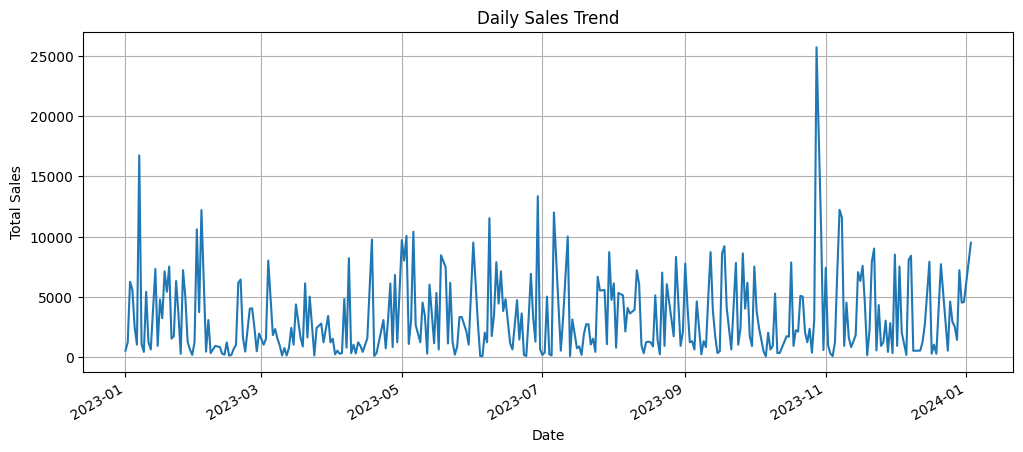

In [6]:
#Sales trend overtime
# Convert OrderDate to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Aggregate total sales by date
sales_trend = df.groupby('OrderDate')['TotalPrice'].sum()

# Plot sales trend
plt.figure(figsize=(12, 5))
sales_trend.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_7804\2955374282.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_spending.index, y=gender_spending.values, palette="coolwarm")


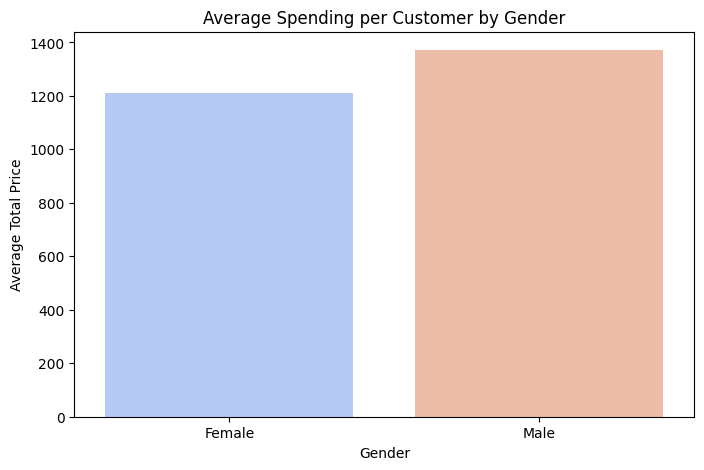

In [7]:
#Gender-Based Spending Trends
# Average spending per gender
gender_spending = df.groupby('Gender')['TotalPrice'].mean().round(2)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_spending.index, y=gender_spending.values, palette="coolwarm")
plt.title("Average Spending per Customer by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Total Price")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_7804\2869500477.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


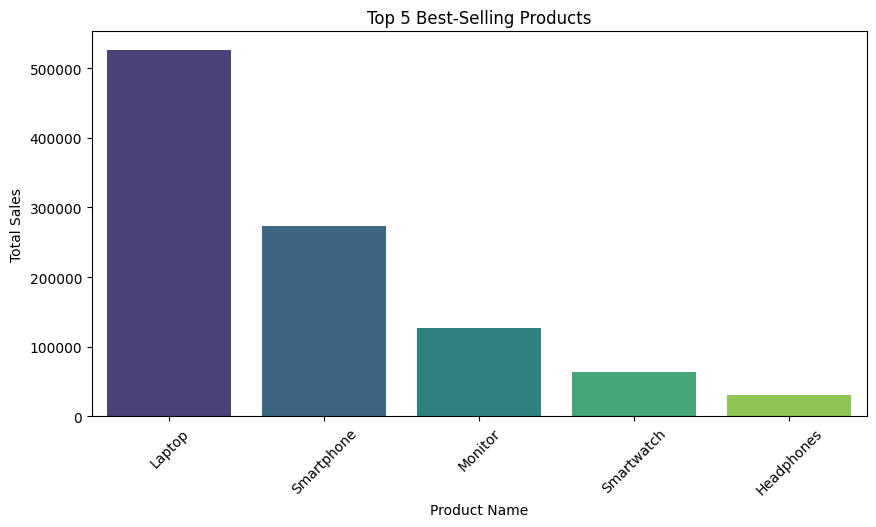

In [8]:
#The Best-Selling Products
# Top-selling products by revenue
top_products = df.groupby('ProductName')['TotalPrice'].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 5 Best-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()


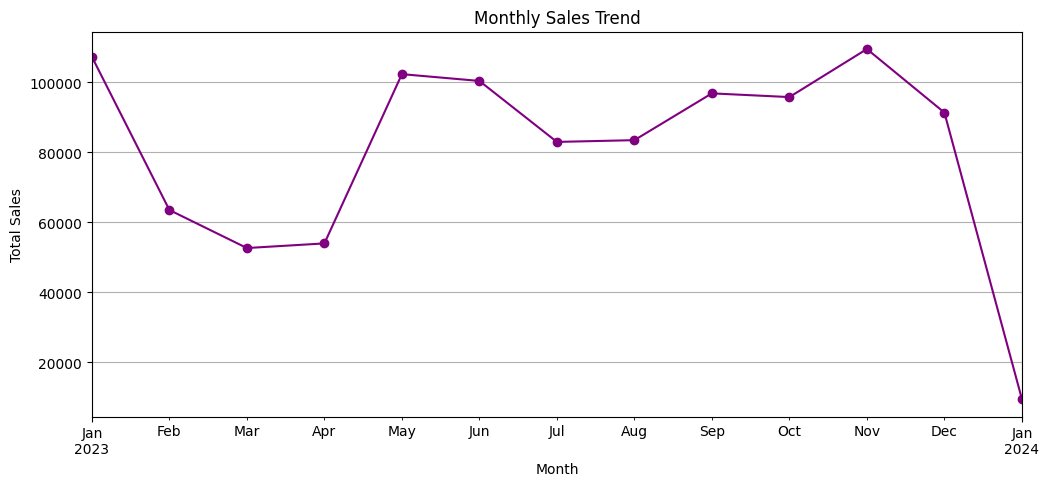

In [9]:
#Monthly Sales Trends
# Convert OrderDate to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Resample data to get monthly total sales
monthly_sales = df.resample('ME', on='OrderDate')['TotalPrice'].sum()

# Plot
plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o', linestyle="-", color="purple")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_7804\1086914159.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="magma")


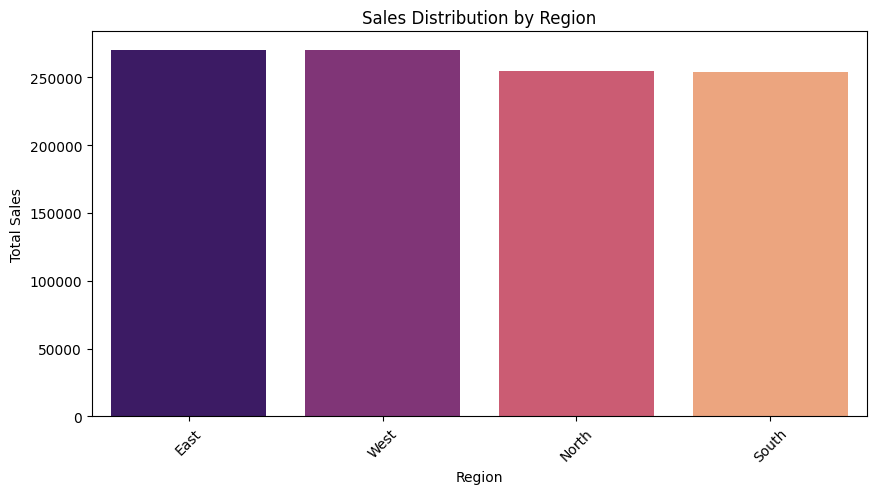

In [10]:
#Revenue by Region
# Sales by Region
sales_by_region = df.groupby('Region')['TotalPrice'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Sales Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_7804\3836554592.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_status_counts.index, y=shipping_status_counts.values, palette="coolwarm")


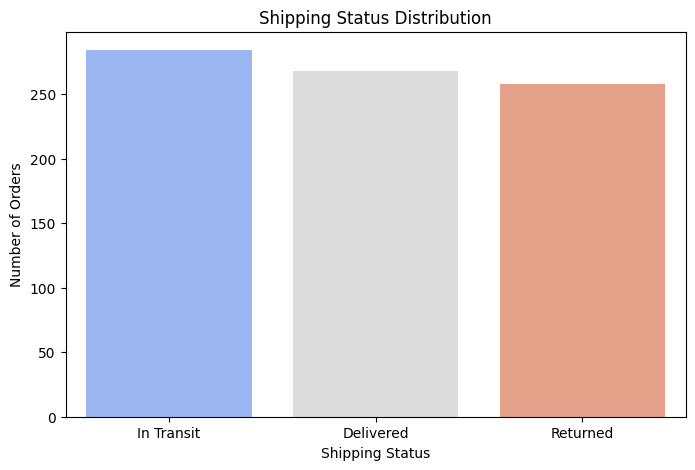

In [11]:
#Order Delivery Status
# Count shipping statuses
shipping_status_counts = df['ShippingStatus'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=shipping_status_counts.index, y=shipping_status_counts.values, palette="coolwarm")
plt.title("Shipping Status Distribution")
plt.xlabel("Shipping Status")
plt.ylabel("Number of Orders")
plt.show()
